# COVID-19 DATA ANALYSIS AND PREDICTION USING MACHINE LEARNING

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random 
import math
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
import datetime
import operator
plt.style.use("fivethirtyeight")
%matplotlib inline

In [2]:
# Getting data of the daily confirmed cases from 22-01-2020
confirmed_cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")

In [3]:
confirmed_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,142414,143183,143439,143439,143439,144285,145008,145552,145996,146523
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,132763,132797,132828,132853,132875,132891,132922,132952,132999,133036
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,157005,158213,159563,160868,162155,163660,165204,167131,168668,170189
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,14379,14464,14498,14498,14498,14577,14586,14586,14655,14678
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,41227,41405,41629,41736,41780,41879,42110,42288,42486,42646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,71144,78269,86957,94913,101173,106347,117121,123640,133405,141122
275,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,315876,315876,315968,315968,316088,316088,316189,316328,316487,316603
276,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,6997,7001,7003,7008,7012,7012,7022,7027,7042,7058
277,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,188573,189731,190615,191527,192071,192316,192956,193432,194140,195096


In [4]:
deaths_reported = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")

In [5]:
deaths_reported

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,6266,6325,6357,6357,6357,6477,6515,6577,6615,6677
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,2456,2456,2456,2456,2456,2456,2456,2457,2457,2457
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,3994,4008,4026,4042,4063,4087,4112,4161,4189,4219
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,128
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,973,977,981,982,984,991,994,1000,1003,1008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,370,370,370,370,370,524,524,630,1022,1161
275,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,3591,3591,3596,3596,3599,3599,3600,3601,3601,3601
276,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1371,1372,1372,1373,1373,1373,1374,1374,1374,1375
277,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,3162,3196,3221,3250,3272,3295,3316,3338,3355,3376


In [6]:
recovered_cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

In [7]:
recovered_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,130097,130109,130118,130125,130139,130152,130166,130174,130187,130205
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,107776,108537,109349,109951,110577,111322,112050,112900,113707,114531
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,13930,13988,13988,13988,13988,14077,14113,14113,14180,14210
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,34893,35082,35284,35423,35474,35686,35742,35964,36025,36708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,11971,13421,15536,17583,19342,21344,22946,27457,31780,35484
260,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,310961,310961,311380,311380,311526,311526,311560,311622,311714,311772
261,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,4162,4162,4163,4166,4166,4166,4168,4168,4171,4171
262,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,175429,177419,179171,180535,181638,182665,183534,183957,185210,186211


In [8]:
# Latest data of the confirmed cases, recoveries, active cases, and deaths for different countries
latest_data = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/08-13-2020.csv")

In [9]:
latest_data

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2020-08-14 04:51:19,33.93911,67.709953,37422,1365,26714,9347.0,Afghanistan,96.135615,3.642048
1,NaN,NaN,NaN,Albania,2020-08-14 04:51:19,41.15330,20.168300,6971,213,3616,3142.0,Albania,242.233651,3.055516
2,NaN,NaN,NaN,Algeria,2020-08-14 04:51:19,28.03390,1.659600,37187,1341,26004,9842.0,Algeria,84.803000,3.606099
3,NaN,NaN,NaN,Andorra,2020-08-14 04:51:19,42.50630,1.521800,981,53,858,70.0,Andorra,1269.656377,5.402650
4,NaN,NaN,NaN,Angola,2020-08-14 04:51:19,-11.20270,17.873900,1815,80,577,1158.0,Angola,5.522379,4.407713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3949,NaN,NaN,Unknown,China,2020-08-14 04:51:19,NaN,NaN,0,0,0,0.0,"Unknown, China",0.000000,0.000000
3950,NaN,NaN,NaN,Kiribati,2020-08-14 04:51:19,-3.37040,-168.734000,0,0,0,0.0,Kiribati,0.000000,0.000000
3951,NaN,NaN,NaN,Palau,2020-08-14 04:51:19,7.51500,134.582500,0,0,0,0.0,Palau,0.000000,0.000000
3952,NaN,NaN,Cook Islands,New Zealand,2020-08-14 04:51:19,-21.23670,-159.777700,0,0,0,0.0,"Cook Islands, New Zealand",0.000000,0.000000


In [10]:
# Extracting all the column names

cols = confirmed_cases.columns
cols

# We could have also used- cols = confirmed_cases.keys()

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '7/21/21', '7/22/21', '7/23/21', '7/24/21', '7/25/21', '7/26/21',
       '7/27/21', '7/28/21', '7/29/21', '7/30/21'],
      dtype='object', length=560)

In [11]:
# extracting the date columns

confirmed = confirmed_cases.iloc[:, 4:-1]
recovered = recovered_cases.iloc[:, 4:-1]
deaths = deaths_reported.iloc[:, 4:-1]

In [12]:
confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21
0,0,0,0,0,0,0,0,0,0,0,...,142414,142414,143183,143439,143439,143439,144285,145008,145552,145996
1,0,0,0,0,0,0,0,0,0,0,...,132740,132763,132797,132828,132853,132875,132891,132922,132952,132999
2,0,0,0,0,0,0,0,0,0,0,...,155784,157005,158213,159563,160868,162155,163660,165204,167131,168668
3,0,0,0,0,0,0,0,0,0,0,...,14379,14379,14464,14498,14498,14498,14577,14586,14586,14655
4,0,0,0,0,0,0,0,0,0,0,...,41061,41227,41405,41629,41736,41780,41879,42110,42288,42486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,0,2,2,2,2,2,2,2,2,2,...,65607,71144,78269,86957,94913,101173,106347,117121,123640,133405
275,0,0,0,0,0,0,0,0,0,0,...,315761,315876,315876,315968,315968,316088,316088,316189,316328,316487
276,0,0,0,0,0,0,0,0,0,0,...,6992,6997,7001,7003,7008,7012,7012,7022,7027,7042
277,0,0,0,0,0,0,0,0,0,0,...,187602,188573,189731,190615,191527,192071,192316,192956,193432,194140


In [13]:
# The analysis has been done on China, India, USA, Spain, France, Germany, UK, Russia, and Italy.
# Creating empty list for total cases, deaths, recovery rate, etc. for different countries.
# These lists will be populated as we extract data for individual country from the main dataset
dates = confirmed.keys()
world_cases = []
total_deaths = []
mortality_rate=[]
recovery_rate=[]
total_recovered=[]
total_active = []

china_cases=[]
italy_cases=[]
us_cases=[]
spain_cases=[]
france_cases=[]
germany_cases=[]
uk_cases=[]
russia_cases=[]
india_cases=[]

china_deaths=[]
italy_deaths=[]
us_deaths=[]
spain_deaths=[]
france_deaths=[]
germany_deaths=[]
uk_deaths=[]
russia_deaths=[]
india_deaths=[]

china_recoveries=[]
italy_recoveries=[]
us_recoveries=[]
spain_recoveries=[]
france_recoveries=[]
germany_recoveries=[]
uk_recoveries=[]
russia_recoveries=[]
india_recoveries=[]

In [14]:
dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '7/20/21', '7/21/21', '7/22/21', '7/23/21', '7/24/21', '7/25/21',
       '7/26/21', '7/27/21', '7/28/21', '7/29/21'],
      dtype='object', length=555)

In [15]:
# Extracting data for individual country from the main dataset and appending it to respective lists
for i in dates:
    confirmed_sum = confirmed[i].sum()
    deaths_sum = deaths[i].sum()
    recovered_sum = recovered[i].sum()
    
    world_cases.append(confirmed_sum)
    total_recovered.append(recovered_sum)
    total_deaths.append(deaths_sum)
    total_active.append(confirmed_sum-deaths_sum- recovered_sum)
    mortality_rate.append(deaths_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)
    
    china_cases.append(confirmed_cases[confirmed_cases["Country/Region"]=="China"][i].sum())
    italy_cases.append(confirmed_cases[confirmed_cases["Country/Region"]=="Italy"][i].sum())  
    us_cases.append(confirmed_cases[confirmed_cases["Country/Region"]=="US"][i].sum())
    spain_cases.append(confirmed_cases[confirmed_cases["Country/Region"]=="Spain"][i].sum())
    france_cases.append(confirmed_cases[confirmed_cases["Country/Region"]=="France"][i].sum())
    germany_cases.append(confirmed_cases[confirmed_cases["Country/Region"]=="Germany"][i].sum())
    uk_cases.append(confirmed_cases[confirmed_cases["Country/Region"]=="UK"][i].sum())
    russia_cases.append(confirmed_cases[confirmed_cases["Country/Region"]=="Russia"][i].sum())
    india_cases.append(confirmed_cases[confirmed_cases["Country/Region"]=="India"][i].sum())                
    
    china_deaths.append(deaths_reported[deaths_reported["Country/Region"]=="China"][i].sum())
    italy_deaths.append(deaths_reported[deaths_reported["Country/Region"]=="Italy"][i].sum())
    us_deaths.append(deaths_reported[deaths_reported["Country/Region"]=="US"][i].sum())
    spain_deaths.append(deaths_reported[deaths_reported["Country/Region"]=="Spain"][i].sum())
    france_deaths.append(deaths_reported[deaths_reported["Country/Region"]=="France"][i].sum())
    germany_deaths.append(deaths_reported[deaths_reported["Country/Region"]=="Germany"][i].sum())
    uk_deaths.append(deaths_reported[deaths_reported["Country/Region"]=="UK"][i].sum())
    russia_deaths.append(deaths_reported[deaths_reported["Country/Region"]=="Russia"][i].sum())
    india_deaths.append(deaths_reported[deaths_reported["Country/Region"]=="India"][i].sum())
    
    china_recoveries.append(recovered_cases[recovered_cases["Country/Region"]=="China"][i].sum())
    italy_recoveries.append(recovered_cases[recovered_cases["Country/Region"]=="Italy"][i].sum())
    us_recoveries.append(recovered_cases[recovered_cases["Country/Region"]=="US"][i].sum())
    spain_recoveries.append(recovered_cases[recovered_cases["Country/Region"]=="Spain"][i].sum())
    france_recoveries.append(recovered_cases[recovered_cases["Country/Region"]=="France"][i].sum())
    germany_recoveries.append(recovered_cases[recovered_cases["Country/Region"]=="Germany"][i].sum())
    uk_recoveries.append(recovered_cases[recovered_cases["Country/Region"]=="UK"][i].sum())
    russia_recoveries.append(recovered_cases[recovered_cases["Country/Region"]=="Russia"][i].sum())
    india_recoveries.append(recovered_cases[recovered_cases["Country/Region"]=="India"][i].sum())
    
    
    

In [16]:
china_deaths

[17,
 18,
 26,
 42,
 56,
 82,
 131,
 133,
 171,
 213,
 259,
 361,
 425,
 491,
 563,
 633,
 718,
 805,
 905,
 1012,
 1112,
 1117,
 1369,
 1521,
 1663,
 1766,
 1864,
 2003,
 2116,
 2238,
 2238,
 2443,
 2445,
 2595,
 2665,
 2717,
 2746,
 2790,
 2837,
 2872,
 2914,
 2947,
 2983,
 3015,
 3044,
 3072,
 3100,
 3123,
 3139,
 3161,
 3172,
 3180,
 3193,
 3203,
 3217,
 3230,
 3241,
 3249,
 3253,
 3259,
 3274,
 3274,
 3281,
 3285,
 3291,
 3296,
 3299,
 3304,
 3308,
 3309,
 3316,
 3322,
 3326,
 3330,
 3333,
 3335,
 3335,
 3337,
 3339,
 3340,
 3343,
 3343,
 3345,
 3345,
 3346,
 3346,
 4636,
 4636,
 4636,
 4636,
 4636,
 4636,
 4636,
 4636,
 4636,
 4637,
 4637,
 4637,
 4637,
 4637,
 4637,
 4637,
 4637,
 4637,
 4637,
 4637,
 4637,
 4637,
 4637,
 4637,
 4637,
 4637,
 4637,
 4637,
 4637,
 4638,
 4638,
 4638,
 4638,
 4638,
 4638,
 4638,
 4638,
 4638,
 4638,
 4638,
 4638,
 4638,
 4638,
 4638,
 4638,
 4638,
 4638,
 4638,
 4638,
 4638,
 4638,
 4638,
 4638,
 4638,
 4638,
 4638,
 4638,
 4638,
 4638,
 4638,
 46

In [17]:
total_deaths

[17,
 18,
 26,
 42,
 56,
 82,
 131,
 133,
 171,
 213,
 259,
 362,
 426,
 492,
 564,
 634,
 719,
 806,
 906,
 1013,
 1113,
 1118,
 1371,
 1523,
 1666,
 1770,
 1868,
 2008,
 2123,
 2248,
 2252,
 2459,
 2470,
 2630,
 2710,
 2771,
 2814,
 2873,
 2942,
 2996,
 3085,
 3160,
 3255,
 3349,
 3461,
 3565,
 3805,
 3995,
 4269,
 4613,
 4920,
 5417,
 5837,
 6480,
 7158,
 7976,
 8889,
 10005,
 11493,
 13221,
 14913,
 16864,
 19156,
 21979,
 25017,
 28508,
 32279,
 35773,
 39864,
 44628,
 50633,
 56528,
 62684,
 68681,
 73935,
 79873,
 88174,
 95012,
 102889,
 110311,
 116585,
 122543,
 128565,
 135648,
 144215,
 151642,
 160170,
 166372,
 171729,
 177773,
 185160,
 192210,
 199221,
 206165,
 212028,
 216283,
 221267,
 228090,
 235050,
 241101,
 246580,
 252411,
 256260,
 260850,
 266967,
 273847,
 279534,
 285449,
 290052,
 294067,
 297996,
 303899,
 309381,
 314948,
 320588,
 325145,
 328717,
 332874,
 338007,
 343202,
 348284,
 353966,
 358272,
 361749,
 363366,
 368030,
 373425,
 378436,
 383591,

In [18]:
print(f"Total number of deaths till now: {deaths_sum}")

Total number of deaths till now: 4198939


In [19]:
# User defined function to find the daily increase

def daily_increase(data):
    d =[]
    for i in range(len(data)):
        if i==0:
            d.append(data[0])
        else:
            d.append(data[i]- data[i-1])
    return d
        

In [20]:
# Daily Increase

world_daily_increase = daily_increase(world_cases)
china_daily_increase = daily_increase(china_cases)
italy_daily_increase = daily_increase(italy_cases)
us_daily_increase    = daily_increase(us_cases)
spain_daily_increase = daily_increase(spain_cases)
france_daily_increase = daily_increase(france_cases)
germany_daily_increase = daily_increase(germany_cases)
russia_daily_increase = daily_increase(russia_cases)
india_daily_increase = daily_increase(india_cases)



In [21]:
world_daily_increase

[557,
 98,
 286,
 492,
 685,
 809,
 2651,
 589,
 2068,
 1692,
 2111,
 4749,
 3100,
 4011,
 3745,
 3160,
 3593,
 2734,
 3030,
 2609,
 2042,
 418,
 15153,
 6527,
 2143,
 2183,
 2035,
 1882,
 500,
 560,
 629,
 1761,
 380,
 564,
 854,
 977,
 1360,
 1386,
 1891,
 2382,
 1986,
 2596,
 2310,
 2811,
 3915,
 4094,
 3949,
 4173,
 4824,
 7667,
 5795,
 14380,
 11092,
 11275,
 14799,
 15962,
 19586,
 27095,
 30886,
 32135,
 35055,
 42771,
 41062,
 51038,
 62953,
 65100,
 67222,
 59463,
 65282,
 76841,
 83083,
 83018,
 83758,
 59165,
 71401,
 73391,
 69869,
 83393,
 86887,
 85393,
 74314,
 119931,
 70994,
 84275,
 77602,
 95485,
 88114,
 77155,
 76962,
 75550,
 75757,
 81345,
 84324,
 84173,
 82354,
 71345,
 70240,
 75680,
 77180,
 83543,
 88304,
 79089,
 74979,
 77779,
 80598,
 90161,
 88660,
 90136,
 85179,
 74832,
 76635,
 84512,
 85080,
 96138,
 95803,
 94348,
 78042,
 89128,
 96815,
 102129,
 106642,
 106373,
 104597,
 94192,
 86641,
 93814,
 102743,
 119133,
 120810,
 136493,
 106289,
 96006,


In [22]:
# Daily deaths

world_daily_deaths = daily_increase(total_deaths)
china_daily_deaths = daily_increase(china_deaths)
italy_daily_deaths = daily_increase(italy_deaths)
us_daily_deaths    = daily_increase(us_deaths)
spain_daily_deaths = daily_increase(spain_deaths)
france_daily_deaths = daily_increase(france_deaths)
germany_daily_deaths = daily_increase(germany_deaths)
russia_daily_deaths = daily_increase(russia_deaths)
india_daily_deaths = daily_increase(india_deaths)

In [23]:
world_daily_deaths

[17,
 1,
 8,
 16,
 14,
 26,
 49,
 2,
 38,
 42,
 46,
 103,
 64,
 66,
 72,
 70,
 85,
 87,
 100,
 107,
 100,
 5,
 253,
 152,
 143,
 104,
 98,
 140,
 115,
 125,
 4,
 207,
 11,
 160,
 80,
 61,
 43,
 59,
 69,
 54,
 89,
 75,
 95,
 94,
 112,
 104,
 240,
 190,
 274,
 344,
 307,
 497,
 420,
 643,
 678,
 818,
 913,
 1116,
 1488,
 1728,
 1692,
 1951,
 2292,
 2823,
 3038,
 3491,
 3771,
 3494,
 4091,
 4764,
 6005,
 5895,
 6156,
 5997,
 5254,
 5938,
 8301,
 6838,
 7877,
 7422,
 6274,
 5958,
 6022,
 7083,
 8567,
 7427,
 8528,
 6202,
 5357,
 6044,
 7387,
 7050,
 7011,
 6944,
 5863,
 4255,
 4984,
 6823,
 6960,
 6051,
 5479,
 5831,
 3849,
 4590,
 6117,
 6880,
 5687,
 5915,
 4603,
 4015,
 3929,
 5903,
 5482,
 5567,
 5640,
 4557,
 3572,
 4157,
 5133,
 5195,
 5082,
 5682,
 4306,
 3477,
 1617,
 4664,
 5395,
 5011,
 5155,
 4385,
 3159,
 3505,
 5204,
 5840,
 5431,
 5060,
 4215,
 3186,
 4165,
 5215,
 5474,
 5066,
 4807,
 4461,
 3643,
 3839,
 7137,
 5556,
 5311,
 6386,
 4517,
 4599,
 3737,
 5573,
 5541,
 5038,
 

In [24]:
# Daily recoveries

world_daily_recoveries = daily_increase(total_recovered)
china_daily_recoveries = daily_increase(china_recoveries)
italy_daily_recoveries = daily_increase(italy_recoveries)
us_daily_recoveries    = daily_increase(us_recoveries)
spain_daily_recoveries = daily_increase(spain_recoveries)
france_daily_recoveries = daily_increase(france_recoveries)
germany_daily_recoveries = daily_increase(germany_recoveries)
russia_daily_recoveries = daily_increase(russia_recoveries)
india_daily_recoveries = daily_increase(india_recoveries)

In [25]:
world_daily_recoveries

[30,
 2,
 7,
 3,
 14,
 9,
 43,
 19,
 18,
 80,
 62,
 189,
 151,
 230,
 272,
 363,
 524,
 600,
 629,
 702,
 737,
 467,
 1143,
 1763,
 1339,
 1470,
 1717,
 1769,
 1769,
 2058,
 713,
 3997,
 505,
 1833,
 2678,
 2481,
 2892,
 3432,
 3071,
 2936,
 2884,
 2626,
 2942,
 2626,
 2068,
 2494,
 2337,
 1799,
 1907,
 2598,
 1323,
 1927,
 2372,
 3411,
 2055,
 2744,
 2487,
 1641,
 2445,
 4247,
 6217,
 468,
 9639,
 5779,
 8372,
 8785,
 8511,
 9456,
 15337,
 13590,
 15272,
 17143,
 15422,
 20412,
 13836,
 16709,
 23262,
 28882,
 25254,
 21738,
 26250,
 19383,
 27257,
 25074,
 36539,
 30883,
 26184,
 23866,
 31783,
 22178,
 34802,
 30085,
 28730,
 50029,
 27755,
 28812,
 27884,
 33212,
 42077,
 65116,
 38157,
 40651,
 32533,
 34086,
 36473,
 46119,
 39525,
 36413,
 53441,
 33809,
 46885,
 37042,
 55872,
 39711,
 48103,
 56411,
 41008,
 52916,
 52052,
 58970,
 51220,
 108547,
 54834,
 55527,
 63729,
 55152,
 63327,
 66863,
 77265,
 70450,
 76384,
 54925,
 104112,
 79091,
 70070,
 69165,
 72204,
 55109,
 1

In [26]:
# Creating a list of unique countries

unique_countries = list(set(latest_data["Country_Region"]))

# or 
# list(latest_data["Country_Region"].unique())

In [27]:
unique_countries

['Singapore',
 'Samoa',
 'Albania',
 'Azerbaijan',
 'Costa Rica',
 'Burma',
 'Suriname',
 'Haiti',
 'US',
 'India',
 'Mali',
 'Diamond Princess',
 'Central African Republic',
 'Jordan',
 'Oman',
 'Australia',
 'Namibia',
 'Barbados',
 'Ecuador',
 'Kyrgyzstan',
 'Chile',
 'Belarus',
 'Cameroon',
 'Guinea-Bissau',
 'Latvia',
 'Maldives',
 'Greece',
 'Kosovo',
 'Lebanon',
 'Lesotho',
 'Saudi Arabia',
 'Congo (Kinshasa)',
 'Guyana',
 'Luxembourg',
 'Cambodia',
 'Chad',
 'Bhutan',
 'Summer Olympics 2020',
 'Jamaica',
 'China',
 'Peru',
 'Iceland',
 'Yemen',
 'Korea, South',
 'Russia',
 'Switzerland',
 'Czechia',
 'Argentina',
 'Tanzania',
 'Uruguay',
 'Belize',
 'Austria',
 'Trinidad and Tobago',
 'Papua New Guinea',
 'Bahamas',
 'Mauritania',
 'Brazil',
 'Liechtenstein',
 'Armenia',
 'Mozambique',
 'South Africa',
 'Bahrain',
 'Denmark',
 'Spain',
 'Sierra Leone',
 'Brunei',
 'Afghanistan',
 'Netherlands',
 'Saint Vincent and the Grenadines',
 'Sri Lanka',
 'Laos',
 'Bangladesh',
 'Nicarag

In [28]:
country_confirmed_cases = []
country_death_cases = []
country_active_cases = []
country_recovery_cases = []
country_mortality_rate = []

no_cases = []

for i in unique_countries:
    cases = latest_data[latest_data["Country_Region"]==i]["Confirmed"].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)

for i in no_cases:
    unique_countries.remove(i)
    
    
# sort countries by no of confirmed cases

unique_countries =  [k for k,v in sorted(zip(unique_countries, country_confirmed_cases), key= operator.itemgetter(1), reverse=True)]


for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_data[latest_data["Country_Region"]==unique_countries[i]]["Confirmed"].sum()
    country_death_cases.append(latest_data[latest_data["Country_Region"]==unique_countries[i]]["Deaths"].sum())
    country_recovery_cases.append(latest_data[latest_data["Country_Region"]==unique_countries[i]]["Recovered"].sum())
    country_active_cases.append(country_confirmed_cases[i]- country_death_cases[i]- country_recovery_cases[i])
    country_mortality_rate.append(country_death_cases[i]/country_confirmed_cases[i])
    

In [29]:
unique_countries

['US',
 'Brazil',
 'India',
 'Russia',
 'South Africa',
 'Mexico',
 'Peru',
 'Colombia',
 'Chile',
 'Spain',
 'Iran',
 'United Kingdom',
 'Saudi Arabia',
 'Pakistan',
 'Argentina',
 'Bangladesh',
 'Italy',
 'France',
 'Turkey',
 'Germany',
 'Iraq',
 'Philippines',
 'Indonesia',
 'Canada',
 'Kazakhstan',
 'Qatar',
 'Ecuador',
 'Bolivia',
 'Egypt',
 'Israel',
 'China',
 'Ukraine',
 'Sweden',
 'Dominican Republic',
 'Oman',
 'Panama',
 'Belgium',
 'Kuwait',
 'Belarus',
 'Romania',
 'United Arab Emirates',
 'Netherlands',
 'Guatemala',
 'Singapore',
 'Poland',
 'Portugal',
 'Japan',
 'Honduras',
 'Nigeria',
 'Bahrain',
 'Ghana',
 'Kyrgyzstan',
 'Armenia',
 'Morocco',
 'Afghanistan',
 'Switzerland',
 'Algeria',
 'Azerbaijan',
 'Uzbekistan',
 'Venezuela',
 'Moldova',
 'Serbia',
 'Kenya',
 'Ireland',
 'Ethiopia',
 'Costa Rica',
 'Nepal',
 'Australia',
 'Austria',
 'El Salvador',
 'Czechia',
 'Cameroon',
 "Cote d'Ivoire",
 'Denmark',
 'West Bank and Gaza',
 'Bosnia and Herzegovina',
 'Korea, S

In [30]:
country_df = pd.DataFrame({"Country Name": unique_countries, "No. of confirmed cases": country_confirmed_cases, "No. of deaths": country_death_cases, "No. of recoveries": country_recovery_cases,
                          "No. of active cases": country_active_cases, "Mortality Rate": country_mortality_rate})

# Visualisation

country_df.style.background_gradient(cmap="Blues")

,Country Name,No. of confirmed cases,No. of deaths,No. of recoveries,No. of active cases,Mortality Rate
0,US,5262982,167079,1774648,3321255,0.031746
1,Brazil,3224876,105463,2521100,598313,0.032703
2,India,2461190,48040,1751555,661595,0.019519
3,Russia,905762,15353,714934,175475,0.016950
4,South Africa,572865,11270,437617,123978,0.019673
5,Mexico,505751,55293,406583,43875,0.109329
6,Peru,498555,64139,341938,92478,0.128650
7,Colombia,433805,14145,250494,169166,0.032607
8,Chile,380034,10299,353131,16604,0.027100
9,Spain,337334,28605,150376,158353,0.084797


In [31]:
unique_provinces = list(latest_data["Province_State"].unique())

In [32]:
province_confirmed_cases = []
province_country = []
province_death_cases = []
province_recovery_cases = []
province_mortality_rate = []

no_cases = []

for i in unique_provinces:
    cases = latest_data[latest_data["Province_State"]==i]["Confirmed"].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)

for i in no_cases:
    unique_provinces.remove(i)
    
    
# sort provinces by no of confirmed cases

unique_provinces =  [k for k,v in sorted(zip(unique_provinces, province_confirmed_cases), key= operator.itemgetter(1), reverse=True)]


for i in range(len(unique_provinces)):
    province_confirmed_cases[i] = latest_data[latest_data["Province_State"]==unique_provinces[i]]["Confirmed"].sum()
    province_country.append(latest_data[latest_data["Province_State"]==unique_provinces[i]]["Country_Region"].unique()[0])
    province_death_cases.append(latest_data[latest_data["Province_State"]==unique_provinces[i]]["Deaths"].sum())
    province_recovery_cases.append(latest_data[latest_data["Province_State"]==unique_provinces[i]]["Recovered"].sum())
    province_mortality_rate.append(province_death_cases[i]/province_confirmed_cases[i])
    

In [33]:
province_df = pd.DataFrame({"Province Name": unique_provinces, "Country": province_country, "No. of confirmed cases": province_confirmed_cases, "No. of deaths": province_death_cases, "No. of recoveries": province_recovery_cases,
                          "Mortality Rate": province_mortality_rate})

# Visualisation

province_df.style.background_gradient(cmap="Reds")

,Province Name,Country,No. of confirmed cases,No. of deaths,No. of recoveries,Mortality Rate
0,Sao Paulo,Brazil,674455,26324,457758,0.039030
1,California,US,602811,10881,0,0.018050
2,Maharashtra,India,560126,19063,390958,0.034033
3,Florida,US,557137,8913,0,0.015998
4,Texas,US,535743,10135,0,0.018918
5,New York,US,423440,32638,0,0.077078
6,Tamil Nadu,India,320355,5397,261459,0.016847
7,England,United Kingdom,270971,42072,0,0.155264
8,Metropolitana,Chile,264222,8023,250618,0.030365
9,Andhra Pradesh,India,264142,2378,170984,0.009003


In [34]:
# Dealing with missing values

nan_indices= []

# nan values are usually float
for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)

unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)


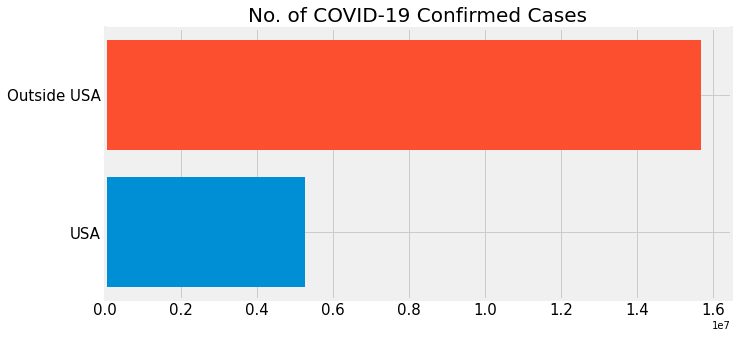

In [35]:
# bar graph to compare cases in US and outside of US

USA_confirmed = latest_data[latest_data["Country_Region"]== "US"]["Confirmed"].sum()
outside_USA_confirmed = np.sum(country_confirmed_cases) - USA_confirmed
plt.figure(figsize=(10,5))
plt.barh("USA", USA_confirmed)
plt.barh("Outside USA", outside_USA_confirmed)
plt.title("No. of COVID-19 Confirmed Cases", size = 20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [36]:
print(f"Outside USA cases are {outside_USA_confirmed}")
print(f"USA Cases are {USA_confirmed}")
print(f"Total Cases are {outside_USA_confirmed + USA_confirmed}")

Outside USA cases are 15677486
USA Cases are 5262982
Total Cases are 20940468


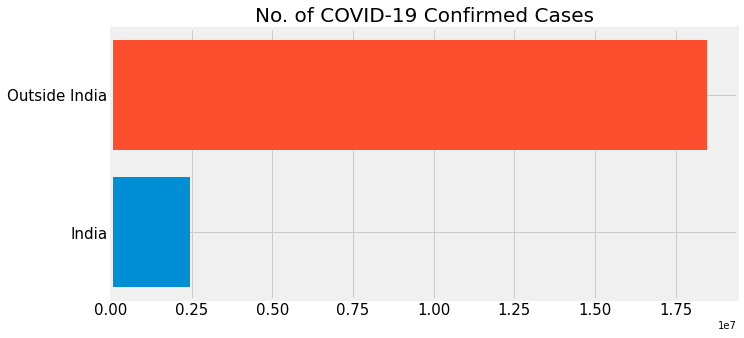

In [37]:
# bar graph to compare cases in India and outside of India

india_confirmed = latest_data[latest_data["Country_Region"]== "India"]["Confirmed"].sum()
outside_india_confirmed = np.sum(country_confirmed_cases) - india_confirmed
plt.figure(figsize=(10,5))
plt.barh("India", india_confirmed)
plt.barh("Outside India", outside_india_confirmed)
plt.title("No. of COVID-19 Confirmed Cases", size = 20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [38]:
print(f"Outside India cases are {outside_india_confirmed}")
print(f"India Cases are {india_confirmed}")
print(f"Total Cases are {outside_india_confirmed + india_confirmed}")

Outside India cases are 18479278
India Cases are 2461190
Total Cases are 20940468


In [39]:
# Only show 10 countries with the most confirmed cases, the rest can be grouped in other category

visual_unique_countries = []
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])
 
for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])

visual_unique_countries.append("Others")
visual_confirmed_cases.append(others)

In [40]:
visual_unique_countries

['US',
 'Brazil',
 'India',
 'Russia',
 'South Africa',
 'Mexico',
 'Peru',
 'Colombia',
 'Chile',
 'Spain',
 'Others']

In [41]:
visual_confirmed_cases

[5262982,
 3224876,
 2461190,
 905762,
 572865,
 505751,
 498555,
 433805,
 380034,
 337334,
 6357314]

In [42]:
def plot_bar_graph(x,y, title):
    plt.figure(figsize=(10,5))
    plt.barh(x,y)
    plt.title(title, size=15)
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.show()

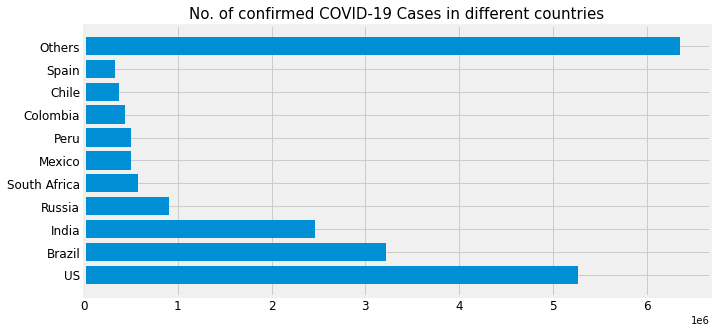

In [43]:
plot_bar_graph(visual_unique_countries, visual_confirmed_cases, "No. of confirmed COVID-19 Cases in different countries")

In [44]:
def plot_pie_chart(x,y, title):
    c = random.choices(list(mcolors.CSS4_COLORS.values()), k = len(unique_countries))
    plt.figure(figsize=(15,8))
    plt.pie(y, shadow= True, colors= c, autopct = '%.2f%%')
    plt.title(title, size=15)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.legend(x, loc= "best", fontsize=12)
    plt.show()

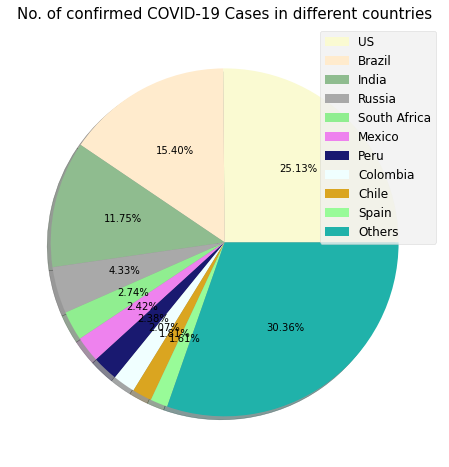

In [45]:
plot_pie_chart(visual_unique_countries, visual_confirmed_cases, "No. of confirmed COVID-19 Cases in different countries")

In [46]:
# Only show 10 provinces with the most confirmed cases, the rest can be grouped in other category

visual_unique_provinces = []
visual_confirmed_cases2 = []
others = np.sum(province_confirmed_cases[10:])
 
for i in range(len(province_confirmed_cases[:10])):
    visual_unique_provinces.append(unique_provinces[i])
    visual_confirmed_cases2.append(province_confirmed_cases[i])

visual_unique_provinces.append("Others")
visual_confirmed_cases2.append(others)

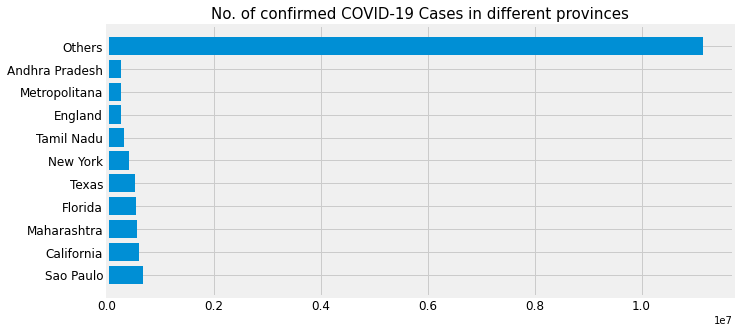

In [47]:
plot_bar_graph(visual_unique_provinces, visual_confirmed_cases2, "No. of confirmed COVID-19 Cases in different provinces")

In [48]:
# A function to plot pie chart for different provinces of a particular country

def plot_pie_country_with_regions(country_name, title):
    regions = list(latest_data[latest_data["Country_Region"]==country_name]["Province_State"].unique())
    confirmed_cases = []
    no_cases=[]
    for i in regions:
        cases = latest_data[latest_data["Province_State"]==i]["Confirmed"].sum()
        if cases >0:
            confirmed_cases.append(cases)
        else:
            no_cases.append(i)
            
#     remove areas with no confirmed cases

    for i in no_cases:
        regions.remove(i)
        
#   only show the top 10 states
    
    regions = [k for k,v in sorted(zip(regions, confirmed_cases), key= operator.itemgetter(1), reverse = True)]
    
    for i in range(len(regions)):
        confirmed_cases[i] = latest_data[latest_data["Province_State"]==regions[i]]["Confirmed"].sum()
        
#     additional province as others

    if (len(regions)>10):
        regions_10 = regions[:10]
        regions_10.append("Others")
        confirmed_cases_10 = confirmed_cases[:10]
        confirmed_cases_10.append(np.sum(confirmed_cases[10:]))
        plot_pie_chart(regions_10, confirmed_cases_10, title)
    else:
        plot_pie_chart(regions, confirmed_cases, title)
        

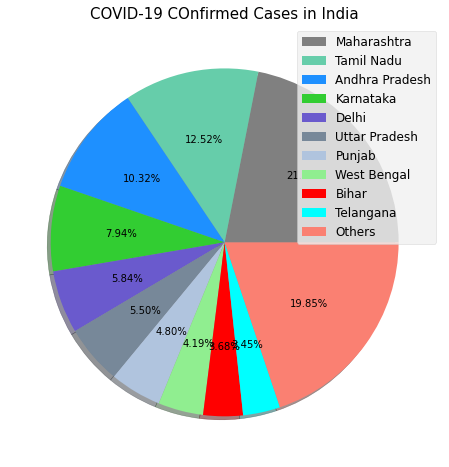

In [49]:
plot_pie_country_with_regions("India", "COVID-19 COnfirmed Cases in India")

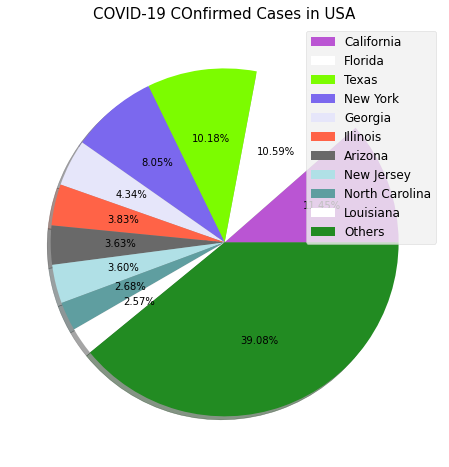

In [50]:
plot_pie_country_with_regions("US", "COVID-19 COnfirmed Cases in USA")

In [51]:
# Let us now build the machine learning model and predict the cases

days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases = np.array(world_cases).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1,1)
total_recovered = np.array(total_recovered).reshape(-1,1)

In [52]:
days_since_1_22

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [53]:
days_in_future = 10
future_forecast = np.array([i for i in range(len(dates) + days_in_future)]).reshape(-1,1)
adjusted_dates = future_forecast[:-10]

In [54]:
adjusted_dates

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [55]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, "%m/%d/%Y")
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days = i)).strftime("%m/%d/%Y"))

In [56]:
future_forecast_dates

['01/22/2020',
 '01/23/2020',
 '01/24/2020',
 '01/25/2020',
 '01/26/2020',
 '01/27/2020',
 '01/28/2020',
 '01/29/2020',
 '01/30/2020',
 '01/31/2020',
 '02/01/2020',
 '02/02/2020',
 '02/03/2020',
 '02/04/2020',
 '02/05/2020',
 '02/06/2020',
 '02/07/2020',
 '02/08/2020',
 '02/09/2020',
 '02/10/2020',
 '02/11/2020',
 '02/12/2020',
 '02/13/2020',
 '02/14/2020',
 '02/15/2020',
 '02/16/2020',
 '02/17/2020',
 '02/18/2020',
 '02/19/2020',
 '02/20/2020',
 '02/21/2020',
 '02/22/2020',
 '02/23/2020',
 '02/24/2020',
 '02/25/2020',
 '02/26/2020',
 '02/27/2020',
 '02/28/2020',
 '02/29/2020',
 '03/01/2020',
 '03/02/2020',
 '03/03/2020',
 '03/04/2020',
 '03/05/2020',
 '03/06/2020',
 '03/07/2020',
 '03/08/2020',
 '03/09/2020',
 '03/10/2020',
 '03/11/2020',
 '03/12/2020',
 '03/13/2020',
 '03/14/2020',
 '03/15/2020',
 '03/16/2020',
 '03/17/2020',
 '03/18/2020',
 '03/19/2020',
 '03/20/2020',
 '03/21/2020',
 '03/22/2020',
 '03/23/2020',
 '03/24/2020',
 '03/25/2020',
 '03/26/2020',
 '03/27/2020',
 '03/28/20

In [57]:
x_train_confirmed, x_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size = 0.25, shuffle = False, random_state = 1)

In [58]:
# transforming data for Polynomial Regression

poly = PolynomialFeatures(degree=2)
poly_x_train_confirmed = poly.fit_transform(x_train_confirmed)
poly_x_test_confirmed = poly.fit_transform(x_test_confirmed)
poly_future_forecast = poly.fit_transform(future_forecast)

In [59]:
# polynomial regression

linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_x_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_x_test_confirmed)
linear_pred = linear_model.predict(poly_future_forecast)
print("MAE:", mean_absolute_error(test_linear_pred, y_test_confirmed))
print("MSE:", mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 20779376.430778958
MSE: 576264572564998.9


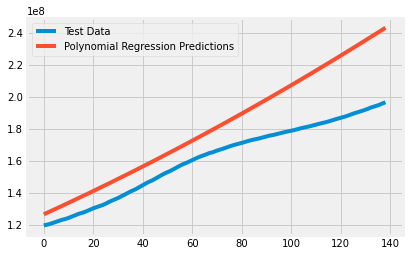

In [60]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(["Test Data", "Polynomial Regression Predictions"])

In [61]:
# build model using SVM

svm_confirmed = SVR(shrinking = False, kernel = "poly", epsilon = 0.01, gamma = 0.1, C= 0.01)
svm_confirmed.fit(x_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forecast)

C:\Users\POWER\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MAE: 70744336.20534992
MSE: 6167384301341729.0


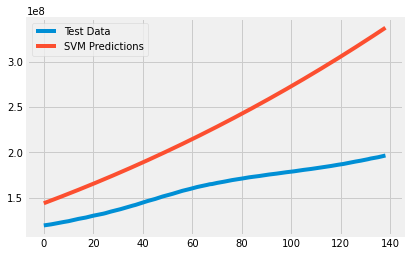

In [62]:
svm_test_pred = svm_confirmed.predict(x_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(["Test Data", "SVM Predictions"])
print("MAE:", mean_absolute_error(svm_test_pred, y_test_confirmed))
print("MSE:", mean_squared_error(svm_test_pred, y_test_confirmed))

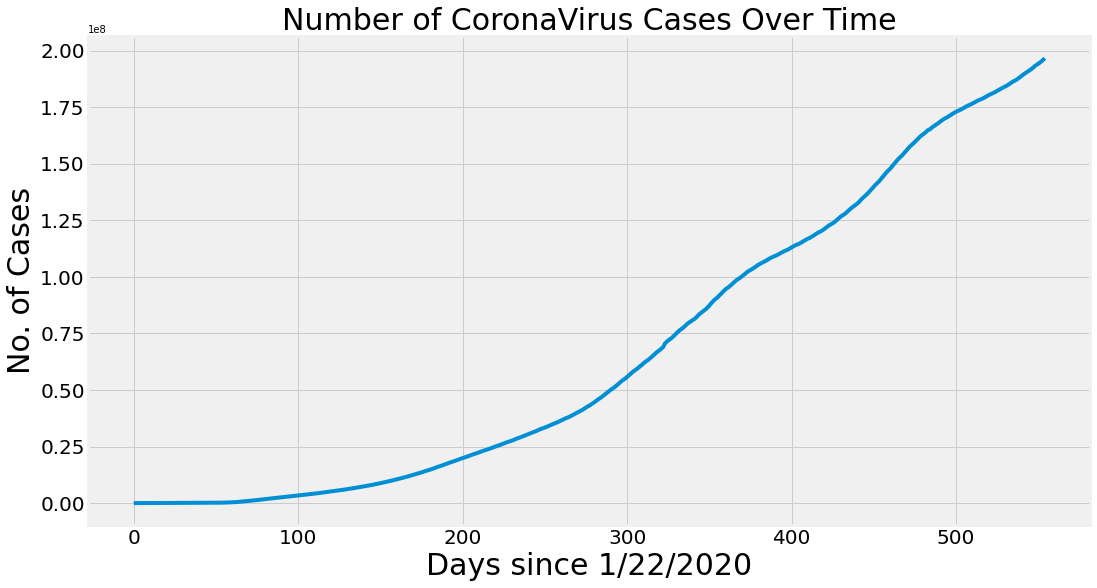

In [63]:
adjusted_dates = adjusted_dates.reshape(1,-1)[0]
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates, world_cases)
plt.title("Number of CoronaVirus Cases Over Time", size=30)
plt.xlabel("Days since 1/22/2020", size = 30)
plt.ylabel("No. of Cases", size = 30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

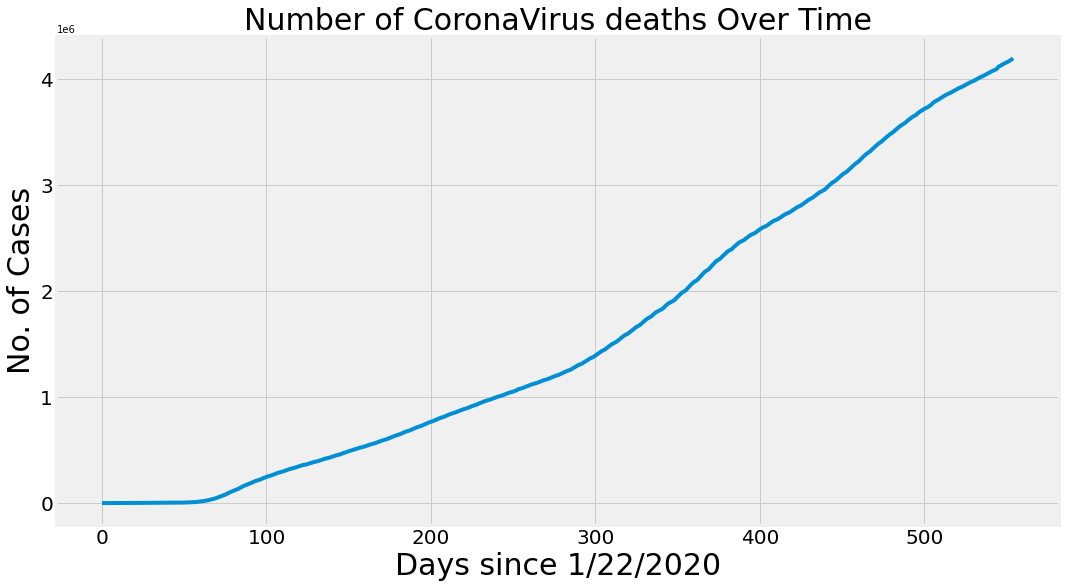

In [64]:
adjusted_dates = adjusted_dates.reshape(1,-1)[0]
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates, total_deaths)
plt.title("Number of CoronaVirus deaths Over Time", size=30)
plt.xlabel("Days since 1/22/2020", size = 30)
plt.ylabel("No. of Cases", size = 30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

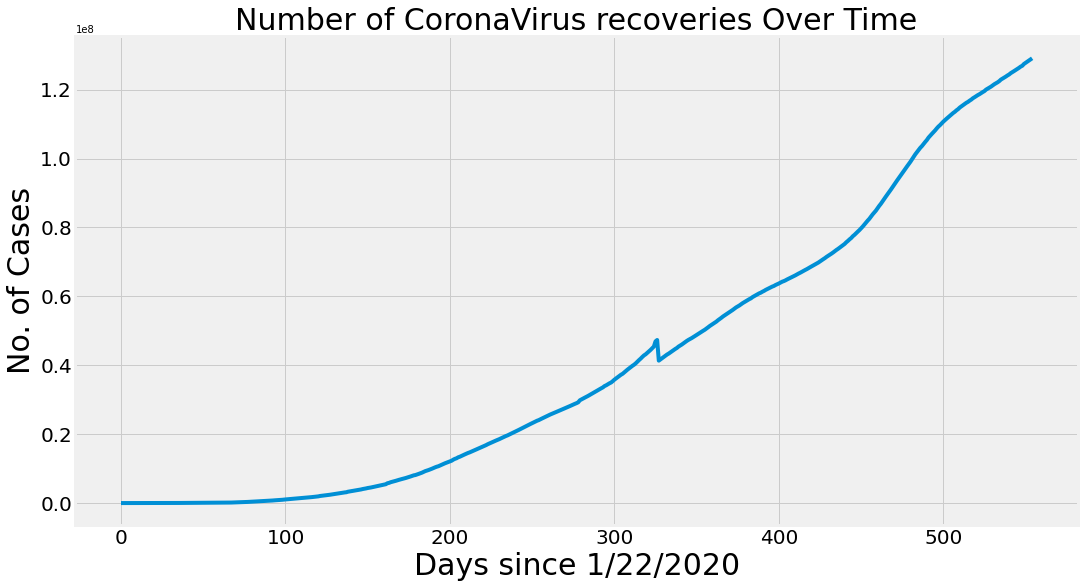

In [65]:
adjusted_dates = adjusted_dates.reshape(1,-1)[0]
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates, total_recovered)
plt.title("Number of CoronaVirus recoveries Over Time", size=30)
plt.xlabel("Days since 1/22/2020", size = 30)
plt.ylabel("No. of Cases", size = 30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

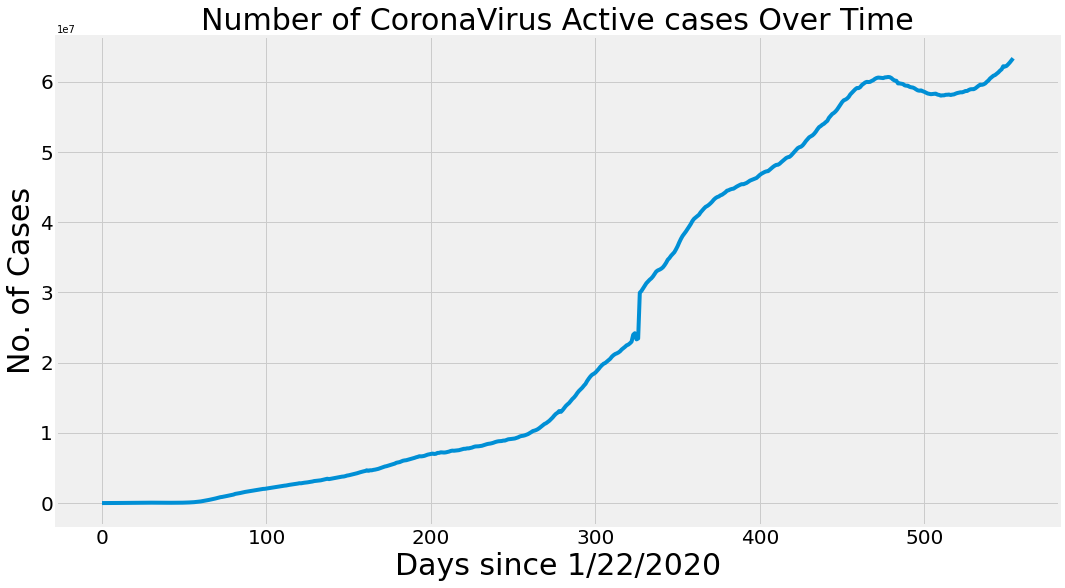

In [66]:
adjusted_dates = adjusted_dates.reshape(1,-1)[0]
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates, total_active)
plt.title("Number of CoronaVirus Active cases Over Time", size=30)
plt.xlabel("Days since 1/22/2020", size = 30)
plt.ylabel("No. of Cases", size = 30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

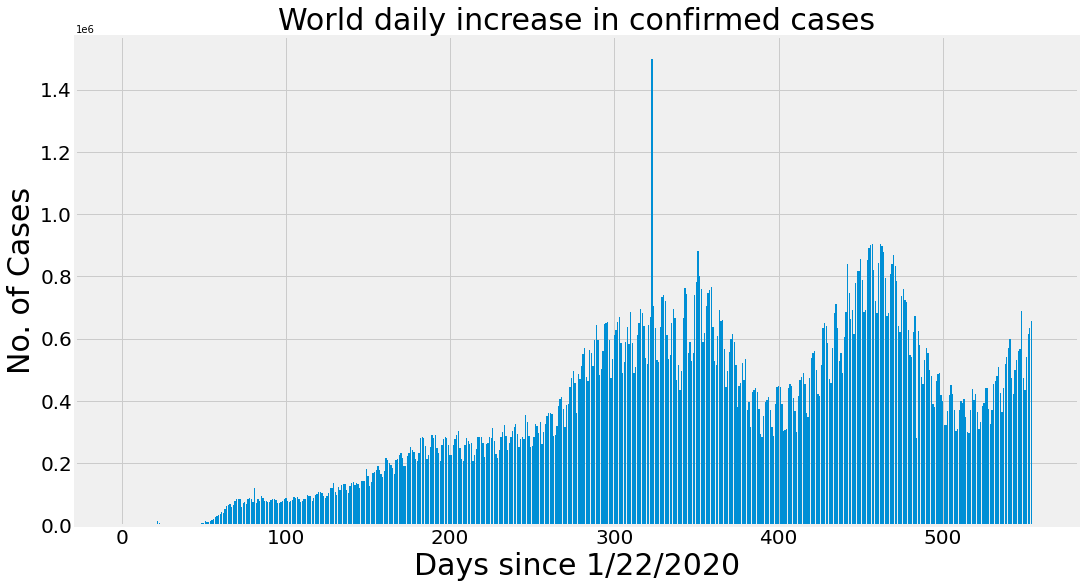

In [67]:
adjusted_dates = adjusted_dates.reshape(1,-1)[0]
plt.figure(figsize=(16,9))
plt.bar(adjusted_dates, world_daily_increase)
plt.title("World daily increase in confirmed cases", size=30)
plt.xlabel("Days since 1/22/2020", size = 30)
plt.ylabel("No. of Cases", size = 30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

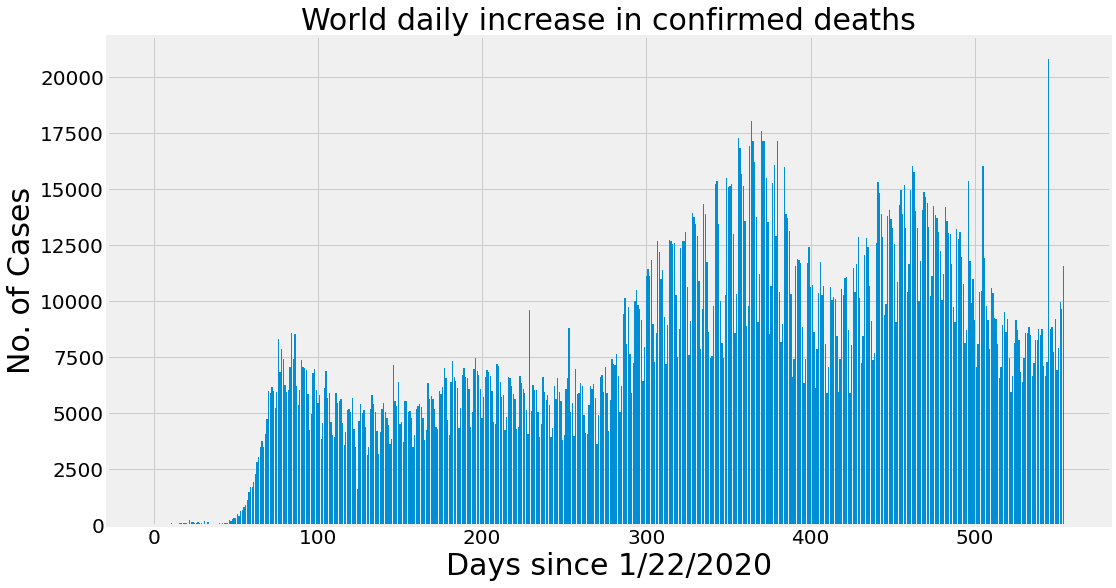

In [68]:
adjusted_dates = adjusted_dates.reshape(1,-1)[0]
plt.figure(figsize=(16,9))
plt.bar(adjusted_dates, world_daily_deaths)
plt.title("World daily increase in confirmed deaths", size=30)
plt.xlabel("Days since 1/22/2020", size = 30)
plt.ylabel("No. of Cases", size = 30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

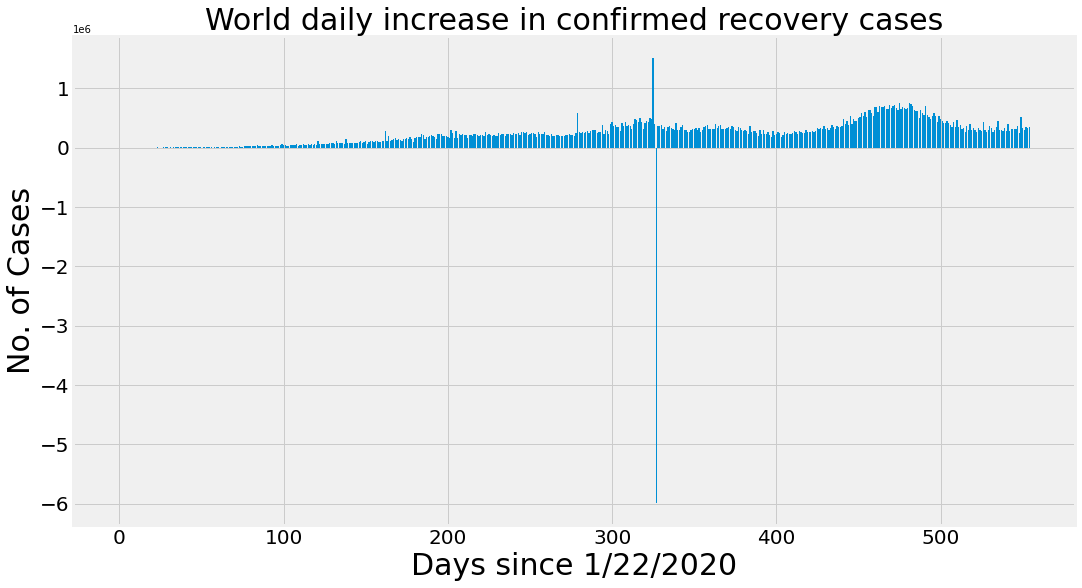

In [69]:
adjusted_dates = adjusted_dates.reshape(1,-1)[0]
plt.figure(figsize=(16,9))
plt.bar(adjusted_dates, world_daily_recoveries)
plt.title("World daily increase in confirmed recovery cases", size=30)
plt.xlabel("Days since 1/22/2020", size = 30)
plt.ylabel("No. of Cases", size = 30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [70]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16,9))
    plt.plot(x,y)
    plt.plot(future_forecast, pred, linestyle = "dashed", color= color)
    plt.title("No. of corona virus cases over time", size = 30)
    plt.xlabel("Days since 1/22/2020", size=30)
    plt.ylabel("No. of cases", size=30)
    plt.legend(["Confirmed Cases", algo_name], prop = {"size":20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
    

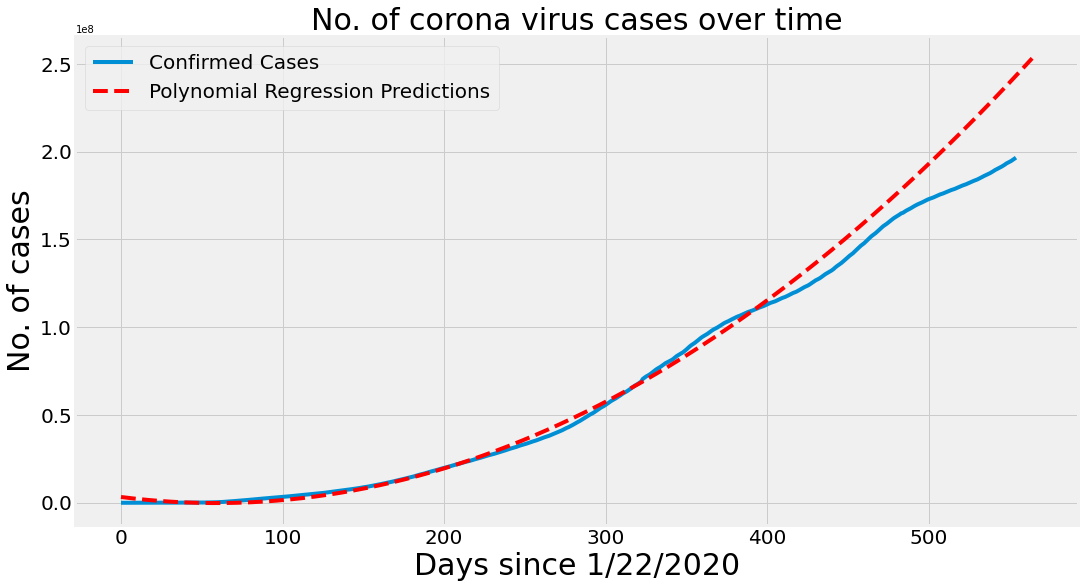

In [71]:
plot_predictions(adjusted_dates, world_cases, linear_pred, "Polynomial Regression Predictions", "red")

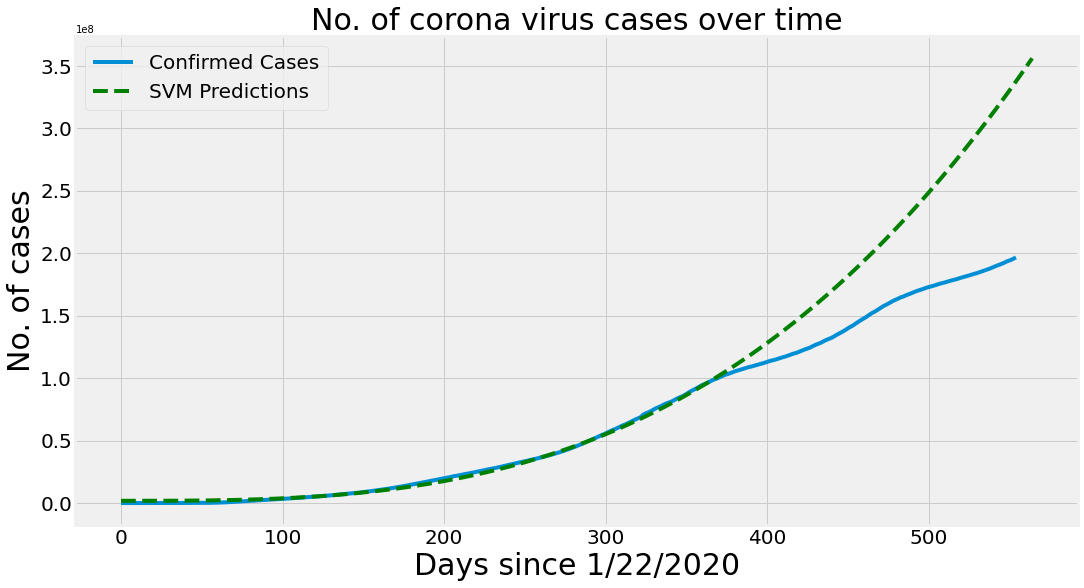

In [72]:
plot_predictions(adjusted_dates, world_cases, svm_pred, "SVM Predictions", "green")

In [73]:
# future predictions using polynomial regression

linear_pred = linear_pred.reshape(1,-2)[0]

poly_df = pd.DataFrame({"Data": future_forecast_dates[-20:], "Predicted No. of confirmed cases worldwide using polynomial reg": np.round(linear_pred[-20:],2)}) 
poly_df                   

,Data,Predicted No. of confirmed cases worldwide using polynomial reg
0,07/20/2021,2.345109e+08
1,07/21/2021,2.354777e+08
2,07/22/2021,2.364464e+08
3,07/23/2021,2.374171e+08
4,07/24/2021,2.383897e+08
5,07/25/2021,2.393644e+08
6,07/26/2021,2.403411e+08
7,07/27/2021,2.413197e+08
8,07/28/2021,2.423004e+08
9,07/29/2021,2.432830e+08


In [74]:
# future predictions using SVM

svm_df = pd.DataFrame({"Data": future_forecast_dates[-20:], "Predicted No. of confirmed cases worldwide using SVM": np.round(svm_pred[-20:],2)}) 
svm_df

,Data,Predicted No. of confirmed cases worldwide using SVM
0,07/20/2021,3.214610e+08
1,07/21/2021,3.232238e+08
2,07/22/2021,3.249931e+08
3,07/23/2021,3.267688e+08
4,07/24/2021,3.285511e+08
5,07/25/2021,3.303399e+08
6,07/26/2021,3.321351e+08
7,07/27/2021,3.339369e+08
8,07/28/2021,3.357453e+08
9,07/29/2021,3.375601e+08


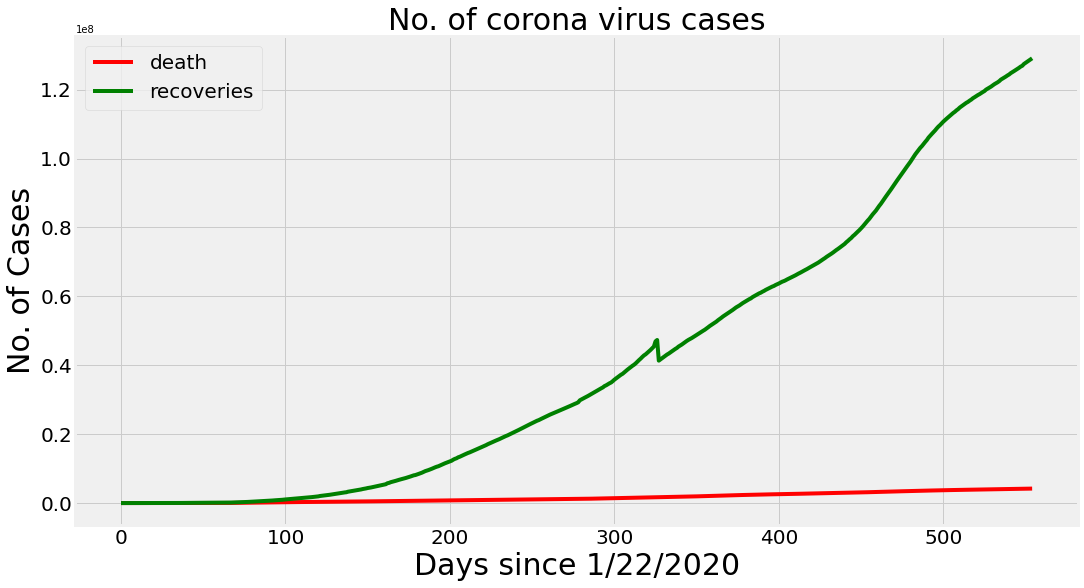

In [75]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates, total_deaths, color="r")
plt.plot(adjusted_dates, total_recovered, color="green")
plt.legend(["death", "recoveries"], loc="best", fontsize=20)
plt.title("No. of corona virus cases", size=30)
plt.xlabel("Days since 1/22/2020", size = 30)
plt.ylabel("No. of Cases", size = 30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

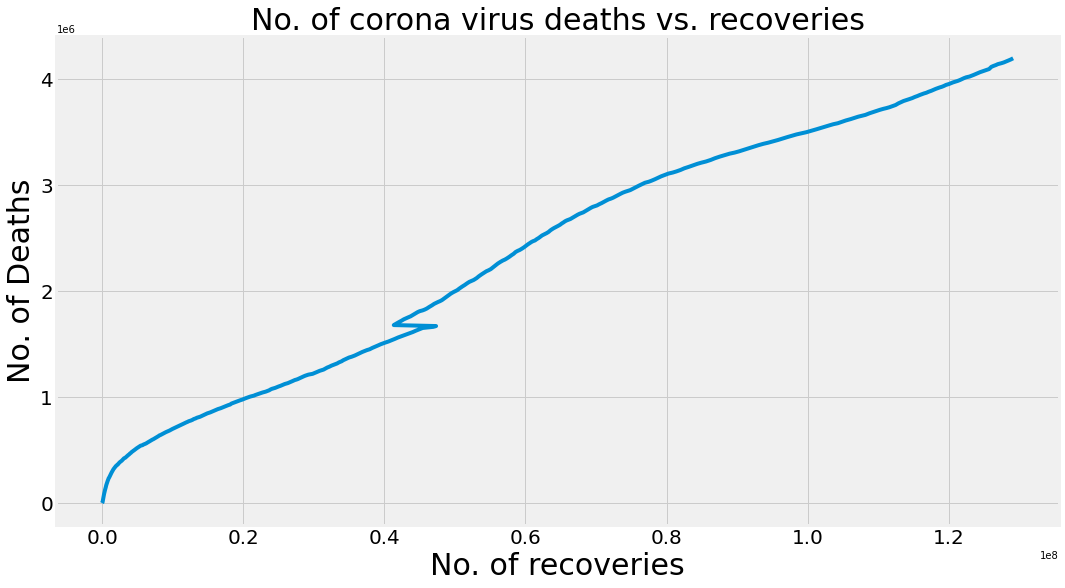

In [76]:
plt.figure(figsize=(16,9))
plt.plot(total_recovered, total_deaths)
plt.title("No. of corona virus deaths vs. recoveries", size=30)
plt.xlabel("No. of recoveries", size = 30)
plt.ylabel("No. of Deaths", size = 30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [77]:
def country_plot(x, y1, y2, y3, y4, country):
    plt.figure(figsize=(16,9))
    plt.plot(x, y1)
    plt.title("{} confirmed cases" .format(country), size=30)
    plt.xlabel("Days since 1/22/2020", size = 30)
    plt.ylabel("No. of Cases", size = 30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
    
    plt.figure(figsize=(16,9))
    plt.bar(x, y2)
    plt.title("{} Daily increase in confirmed cases" .format(country), size=30)
    plt.xlabel("Days since 1/22/2020", size = 30)
    plt.ylabel("No. of Cases", size = 30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
    
    plt.figure(figsize=(16,9))
    plt.bar(x, y3)
    plt.title("{} Daily increase in deaths" .format(country), size=30)
    plt.xlabel("Days since 1/22/2020", size = 30)
    plt.ylabel("No. of Cases", size = 30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
    
    plt.figure(figsize=(16,9))
    plt.bar(x, y4)
    plt.title("{} Daily increase in recoveries" .format(country), size=30)
    plt.xlabel("Days since 1/22/2020", size = 30)
    plt.ylabel("No. of Cases", size = 30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
    
    

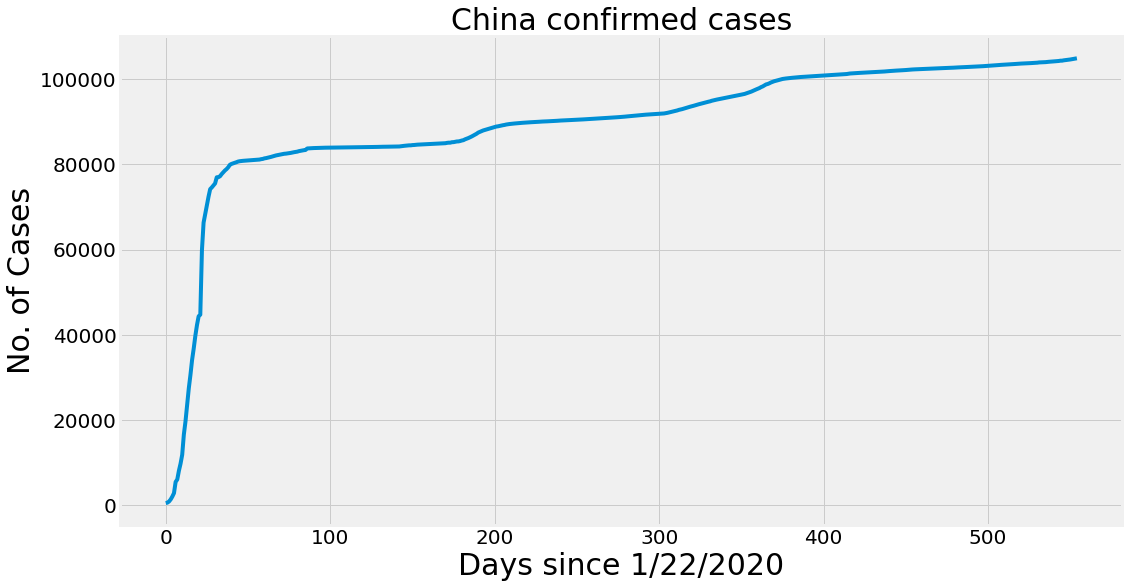

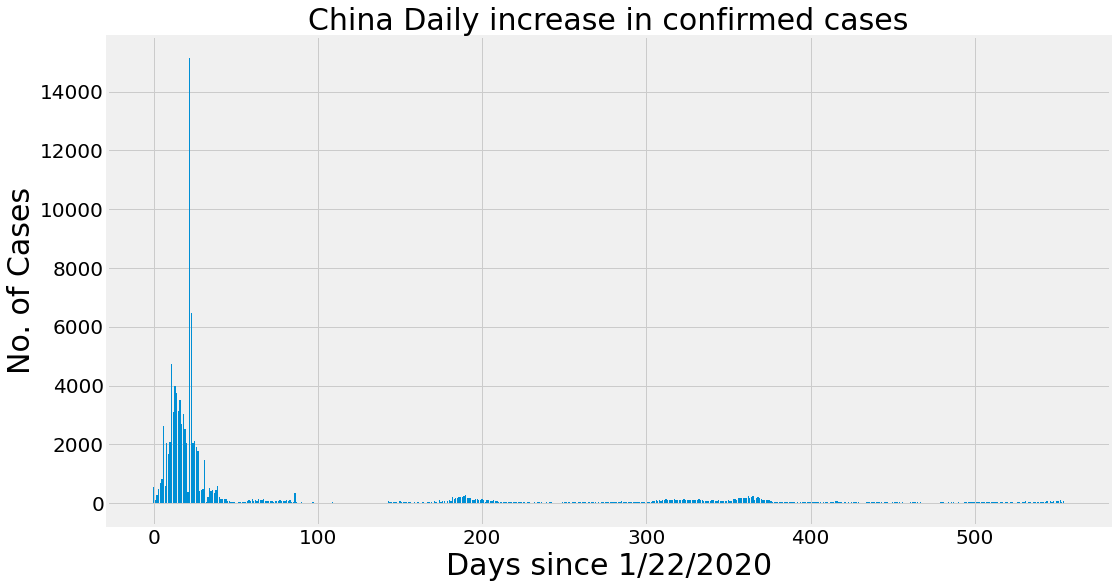

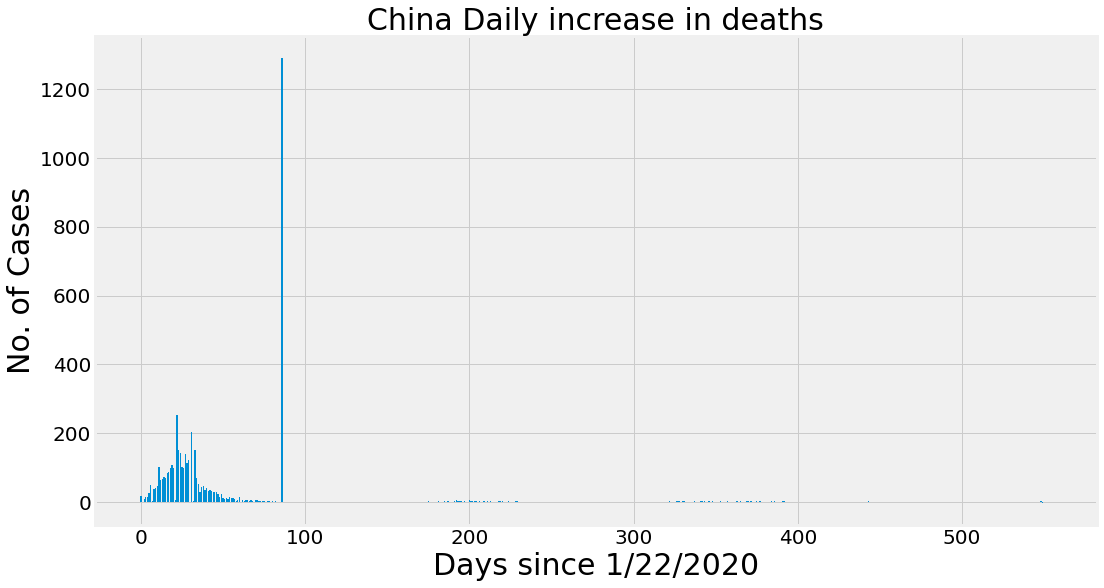

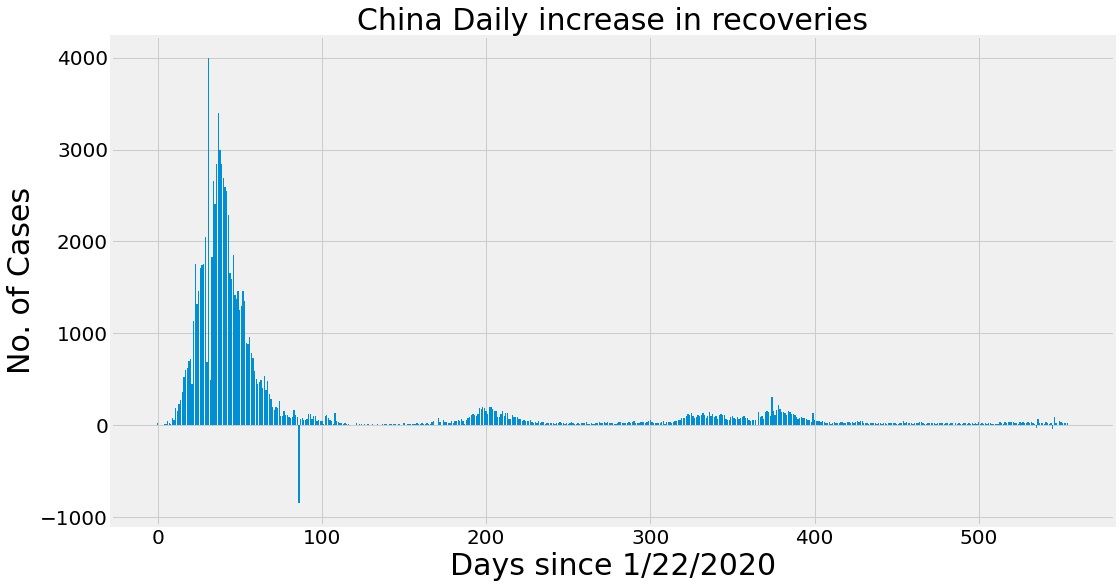

In [78]:
country_plot(adjusted_dates, china_cases, china_daily_increase, china_daily_deaths, china_daily_recoveries, "China")

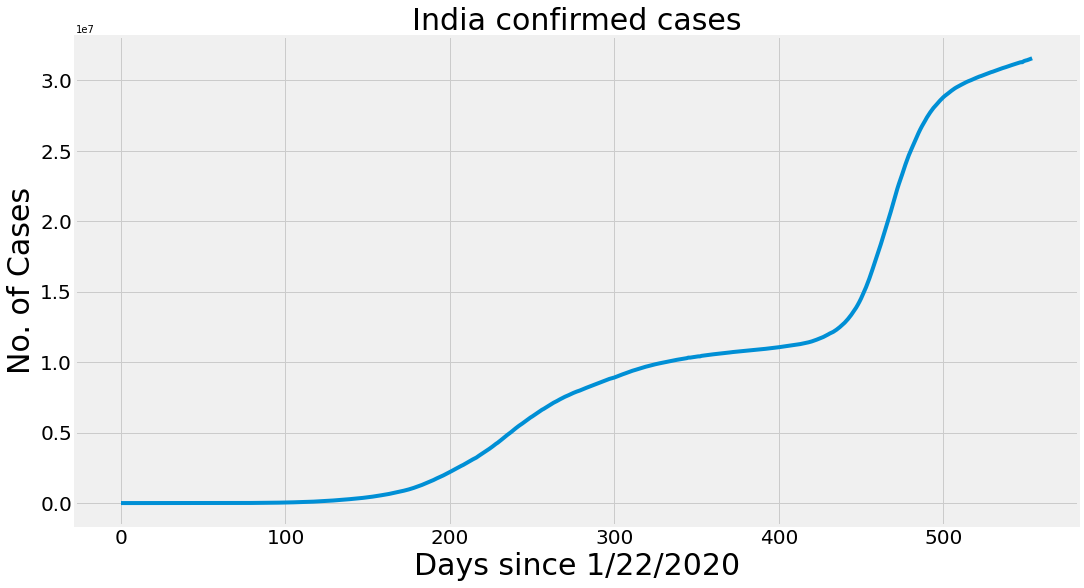

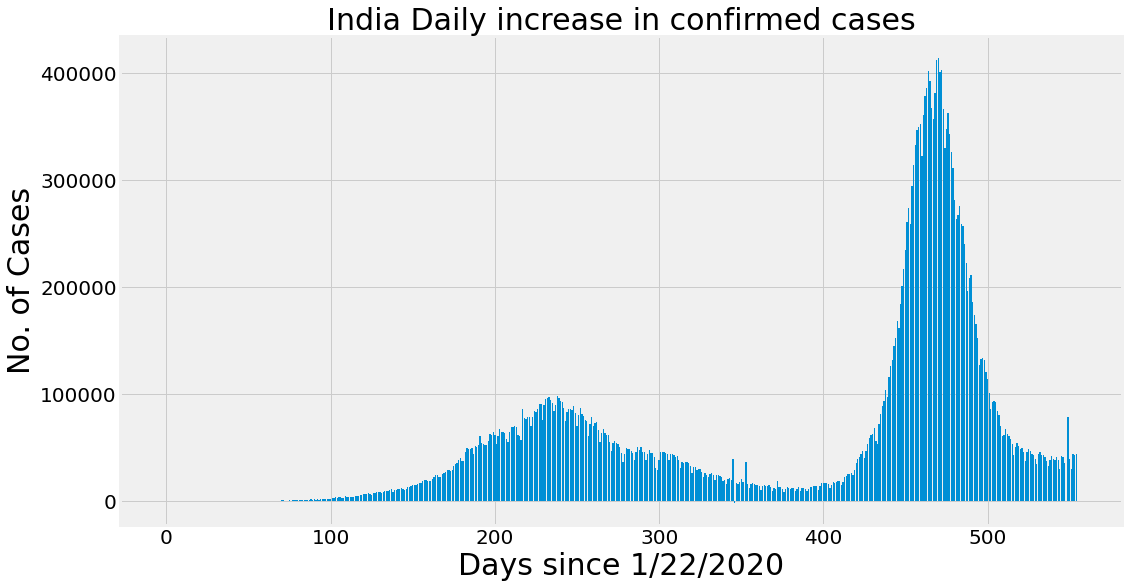

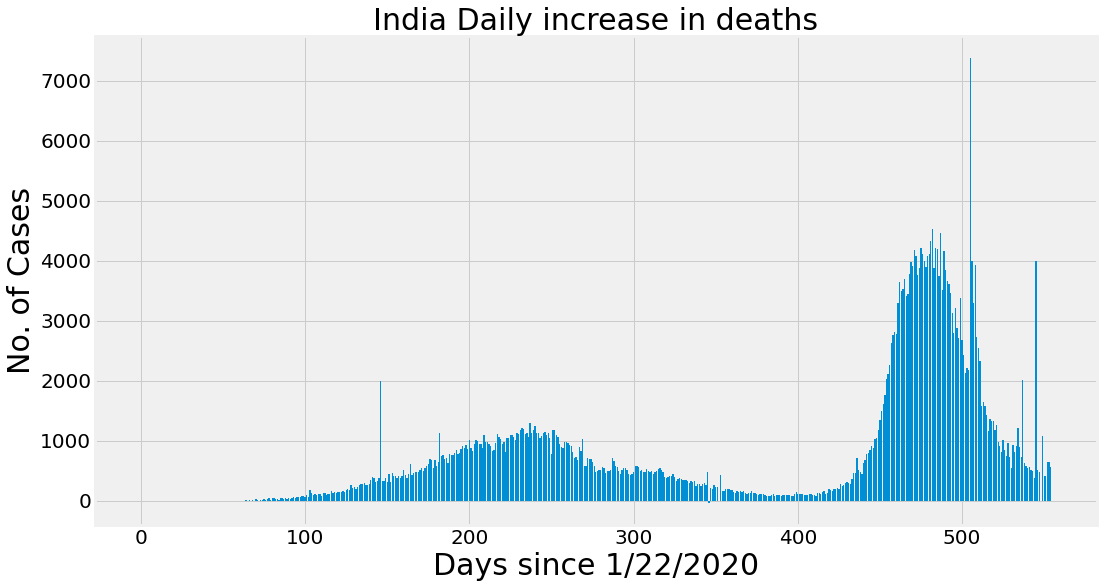

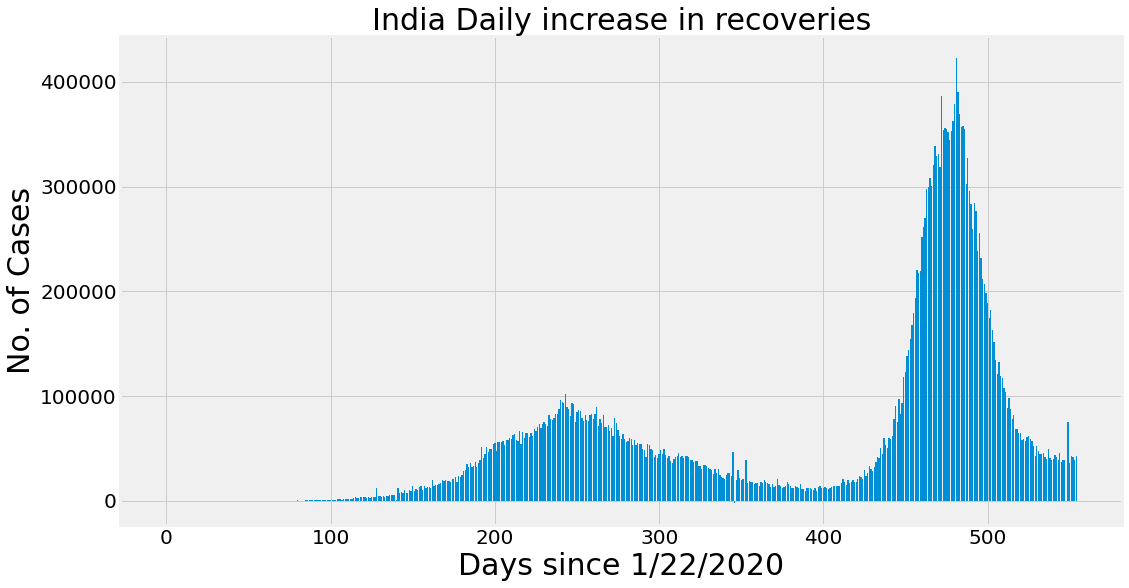

In [79]:
country_plot(adjusted_dates, india_cases, india_daily_increase, india_daily_deaths, india_daily_recoveries, "India")

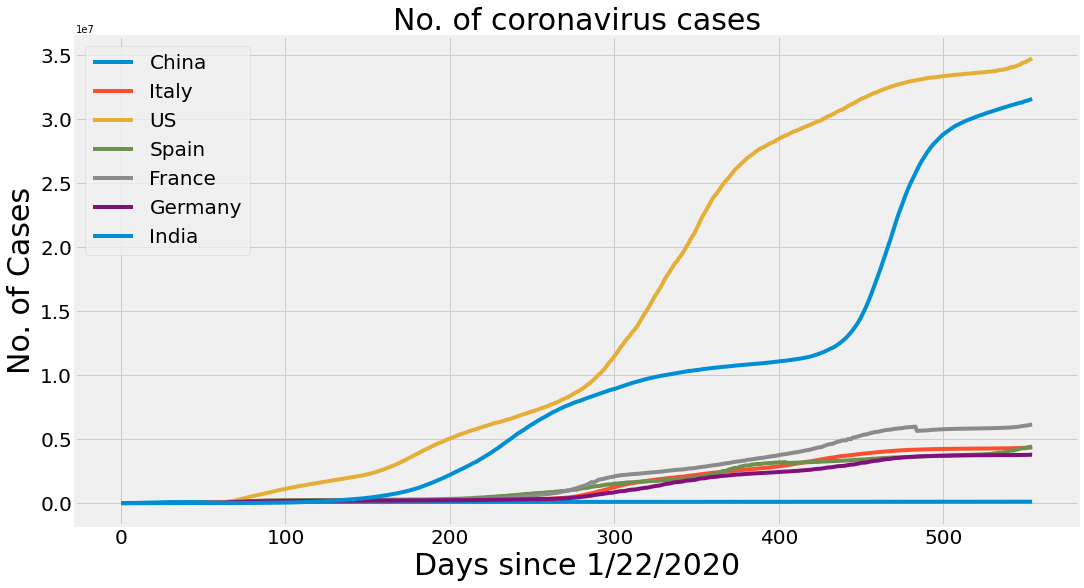

In [80]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates, china_cases)
plt.plot(adjusted_dates, italy_cases)
plt.plot(adjusted_dates, us_cases)
plt.plot(adjusted_dates, spain_cases)
plt.plot(adjusted_dates, france_cases)
plt.plot(adjusted_dates, germany_cases)
plt.plot(adjusted_dates, india_cases)
plt.title("No. of coronavirus cases", size= 30)
plt.xlabel("Days since 1/22/2020", size = 30)
plt.legend(["China", "Italy", "US", "Spain", "France", "Germany", "India"], prop={"size":20})
plt.ylabel("No. of Cases", size = 30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()


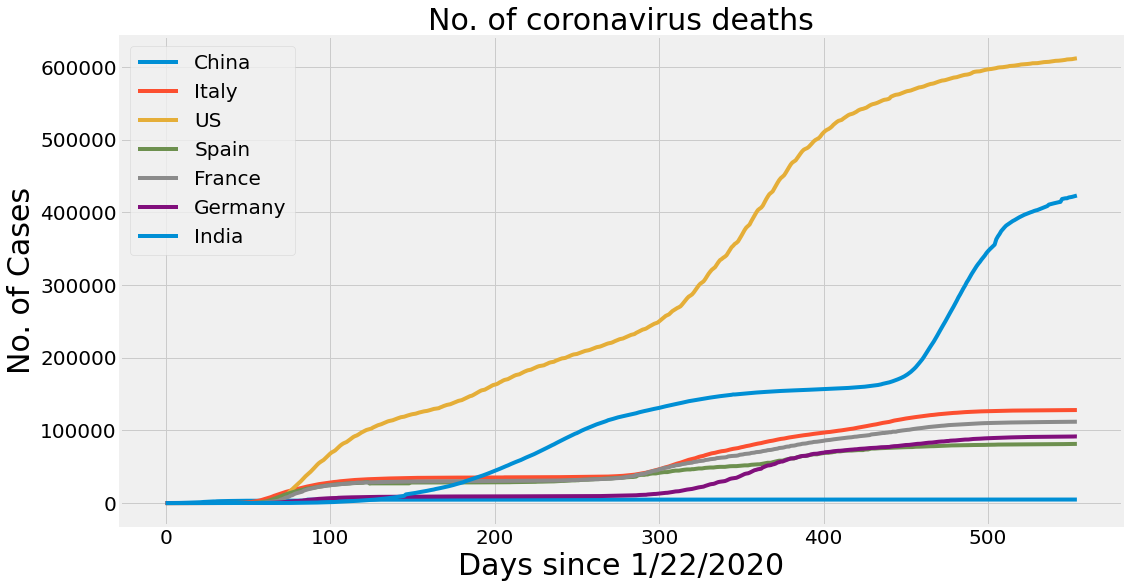

In [81]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates, china_deaths)
plt.plot(adjusted_dates, italy_deaths)
plt.plot(adjusted_dates, us_deaths)
plt.plot(adjusted_dates, spain_deaths)
plt.plot(adjusted_dates, france_deaths)
plt.plot(adjusted_dates, germany_deaths)
plt.plot(adjusted_dates, india_deaths)
plt.title("No. of coronavirus deaths", size= 30)
plt.xlabel("Days since 1/22/2020", size = 30)
plt.legend(["China", "Italy", "US", "Spain", "France", "Germany", "India"], prop={"size":20})
plt.ylabel("No. of Cases", size = 30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()


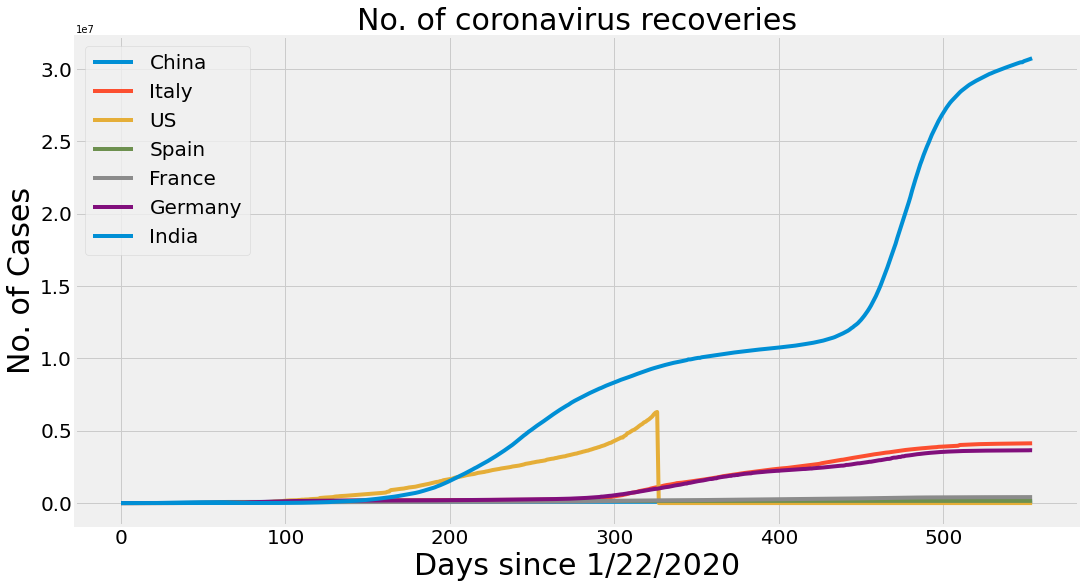

In [82]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates, china_recoveries)
plt.plot(adjusted_dates, italy_recoveries)
plt.plot(adjusted_dates, us_recoveries)
plt.plot(adjusted_dates, spain_recoveries)
plt.plot(adjusted_dates, france_recoveries)
plt.plot(adjusted_dates, germany_recoveries)
plt.plot(adjusted_dates, india_recoveries)
plt.title("No. of coronavirus recoveries", size= 30)
plt.xlabel("Days since 1/22/2020", size = 30)
plt.legend(["China", "Italy", "US", "Spain", "France", "Germany", "India"], prop={"size":20})
plt.ylabel("No. of Cases", size = 30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()